# Project - Classify clothes using TensorFlow
## About the Dataset
Fashion-MNIST is a dataset of Zalando's article images, consisting of a **training set of 60,000 examples** and a **test set of 10,000 examples**. Each example is a **28x28 grayscale image**, associated with a label from **10 classes**. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. Zalando seeks to replace the original MNIST dataset

Training set - 60,000 examples

Test set - 10,000 examples

Each example is a 28x28 grayscale image

10 classes

**Labels**

Each training and test example is assigned to one of the following labels:

0 - T-shirt/top

1 - Trouser

2 - Pullover

3 - Dress

4 - Coat

5 - Sandal

6 - Shirt

7 - Sneaker

8 - Bag

9 - Ankle boot

“Fashion MNIST” dataset here is used for experimenting and practicing machine learning. Fashion-MNIST dataset is a collection of articles images provided by Zalando(https://zalando.com/) . Thanks to Zalando Research(https://github.com/zalandoresearch/fashion-mnist) for hosting the dataset.

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import os

In [3]:
print(tf.VERSION)
print(tf.keras.__version__)

1.14.0
2.2.4-tf


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Fashion - MNIST - https://github.com/zalandoresearch/fashion-mnist
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

Thus we see that training dataset has 60000 images (rows) each of size (28,28) or 28x28 i.e. 2-D images, and each pixel is a value from 0 to 255 describing the pixel intensity. 0 for white and 255 for black.

Since a convolutional layer takes a 2-D image (2-D array) as input, we needn't convert these 2-D images to a 1-D arrays

If we had to feed these 2-D images to a DNN (hidden layer), which expects a 1-D array as input, we would have to convert these 2-D iamges to 1-D arrays before feeding to hidden layer (DNN)

In [8]:
train_labels.shape

(60000,)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
test_labels.shape

(10000,)

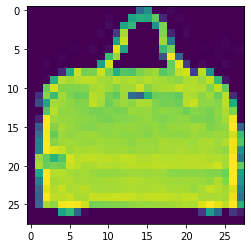

In [11]:
plt.figure()
plt.imshow(np.squeeze(train_images[220]))

In [12]:
train_labels[220]

8

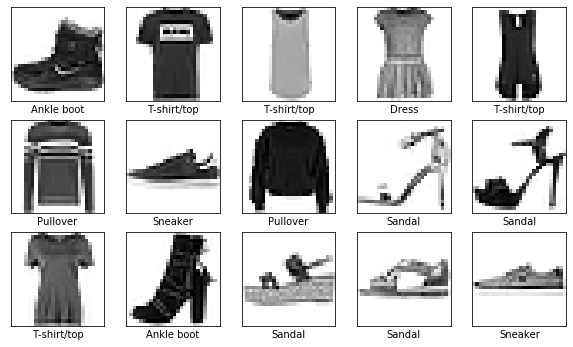

In [13]:
# Let us plot some training images to see how they look
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Now, since, we have one more dimension for the images i.e. Channels (color), let us add it to the dimensions of train_images and test_images by using reshape() function. In this case, it is a single color (hence, channels=1) i.e. 'grayscale'.

In [14]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

The pixel values for the images lie between 0 to 255 now, which is a large range.

Let us normalize these values to a range from 0 to 1. Or  To do this, we can simply divide each pixel value with 255

In [15]:
train_images_norm = train_images / 255.0
test_images_norm = test_images / 255.0

In [16]:
train_images.shape

(60000, 28, 28, 1)

In [20]:
# First convolutional layer. 
# Number of neurons = 32
# filter(kernel) size = 3x3
# Activation function = Relu
# input data (images) size (height, width, channels) = (28, 28, 1)
# Channels is 'colors' here. Since fashion MNIST images are grayscale, number of colors = 1, hence, channels = 1

conv1 = layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=(28,28,1) )

In [21]:
# Second convolutional layer. 
# Number of neurons = 64
# filter(kernel) size = 3x3
# Activation function = Relu
# No separate input data for this layer, input to this layer are the 'weights' of the conv1 layer featureMaps
# no need to specify explicitly the input to the other convolutional layers (except for the first layer, as above)

conv2 = layers.Conv2D(64,kernel_size = (3,3), activation='relu')


In [22]:
# Third convolutional layer. 
# Number of neurons = 128
# filter(kernel) size = 3x3
# Activation function = Relu
# No separate input data for this layer, input to this layer are the 'weights' of the conv2 layer featureMaps
# no need to specify explicitly the input to the other convolutional layers (except for the first layer, as above)

conv3 = layers.Conv2D(128, kernel_size = (3,3), activation='relu')

In [23]:
# Max Pool Layer
# Since input to CNN is a 2-D image and ouput from last convolutional layer (featuerMap) is also 2-D array 
# (except the third dimension i.e. channels), we will use 2D version of Max Pooling function of TensorFlow Keras
# to create a Max Pooling Layer, as shown below filter (kernel) size for Pooling Layer = 2x2

#Creating first Max. Pooling Layer
max_pool_1 = layers.MaxPooling2D((2,2))

#Creating second Max. Pooling Layer
max_pool_2 = layers.MaxPooling2D((2,2))

#Creating third Max. Pooling Layer
max_pool_3 = layers.MaxPooling2D((2,2))

Let us create a Fully Connected Layer (Hidden Layer) and an Output Layer to perform Classification

In [24]:
# Fully Connected (FC) Layer i.e. hidden layer expects input in 1-D format (1-D array), hence, we need to convert
# 2-D output (2-D array) of last convolutional layer (conv3) to 1-D array i.e. we need to flatten the 2-D array
# to 1-D array

flat_layer = layers.Flatten()

In [25]:
# Fully Connected (FC) Layer - Hidden(Dense) Layer
# Normally, the number of neurons that we keep in FC layer should be equal to the number of neurons in just
# immediate previous convolutional layer

fc = layers.Dense(128, activation='relu')

In [26]:
# Output Layer - with 10 neurons (as we have 10 output classes) and using 'softmax' function

output = layers.Dense(10, 'softmax')

In [27]:
# Creating first dropout layer (for the first Conv. layer 'conv1')
drop_1 = keras.layers.Dropout(0.5)
# Creating second dropout layer (for the second Conv. layer 'conv2')
drop_2 = keras.layers.Dropout(0.5)
# Creating third dropout layer (for the third Conv. layer 'conv3')
drop_3 = keras.layers.Dropout(0.5)

In [28]:
# Let us create a neural network by applying these above created Dropout Layers to the respecive convolutional Layers 

# Please note that the Dropout layer for all the convolutional layers will be applied after the pooling layer (max. pool layer)

new_model = models.Sequential()

In [29]:
new_model.add(conv1)
# No Pooling Layer and Dropout layer for first Convolutional layer 'conv1'
new_model.add(conv2)
new_model.add(max_pool_2)
new_model.add(drop_2)
new_model.add(conv3)
new_model.add(max_pool_3)
new_model.add(drop_3)
new_model.add(flat_layer)
new_model.add(fc)
new_model.add(output)

Let us now specify the optimizer(adam), loss function(crossentropy) and metrics(accuracy) for this model

In [31]:
new_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
# Let us see what all layers our model has

new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 128)         0

In [32]:
#from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [58]:
# simple early stopping
#es = EarlyStopping(monitor='val_loss',mode = 'min',patience=5, verbose=1)

In [70]:
#mc = ModelCheckpoint(filepath='best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
#During training, the entire model will be saved to the file “best_model.h5” only when accuracy on the validation dataset improves overall across the entire training process.

In [33]:
# we are using the normalized input data

# Let us perform 20 epochs with batch_size as 512, and with shuffling = true 

# shuffle=true will shuffle the indexes of the instances in order to allocate different sets of instances 
# in validation dataset each time cross-validation runs

# validation split=0.1 means a validation dataset of size of 10% is created from the training dataset for cross validation

new_model.fit(train_images_norm, train_labels, epochs=20, batch_size=1000, shuffle=True, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 44s 812us/sample - loss: 0.9971 - acc: 0.6321 - val_loss: 0.6117 - val_acc: 0.7778
Epoch 2/20
54000/54000 [==============================] - 44s 821us/sample - loss: 0.5549 - acc: 0.7920 - val_loss: 0.4586 - val_acc: 0.8330
Epoch 3/20
54000/54000 [==============================] - 44s 815us/sample - loss: 0.4639 - acc: 0.8315 - val_loss: 0.3952 - val_acc: 0.8530
Epoch 4/20
54000/54000 [==============================] - 44s 810us/sample - loss: 0.4147 - acc: 0.8509 - val_loss: 0.3590 - val_acc: 0.8747
Epoch 5/20
54000/54000 [==============================] - 43s 789us/sample - loss: 0.3765 - acc: 0.8649 - val_loss: 0.3314 - val_acc: 0.8847
Epoch 6/20
54000/54000 [==============================] - 44s 809us/sample - loss: 0.3588 - acc: 0.8698 - val_loss: 0.3117 - val_acc: 0.8882
Epoch 7/20
54000/54000 [==============================] - 46s 848us/sample - loss: 0.3331 - acc: 0.8782 -

In [40]:

# load the saved model
#saved_model = load_model('best_model.h5')

In [36]:
test_loss, test_accuracy = new_model.evaluate(test_images_norm, test_labels)

10000/10000 [==============================] - 3s 285us/sample - loss: 0.2270 - acc: 0.9207


In [37]:
print(test_accuracy)

0.9207


In [38]:
print(test_loss)

0.22696104736328124


In [41]:
print(new_model.history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


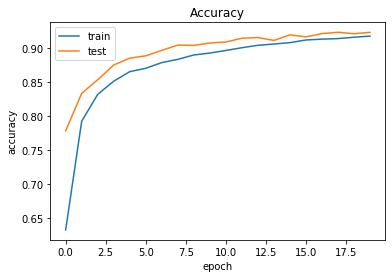

In [39]:
plt.plot(new_model.history.history['acc'])
plt.plot(new_model.history.history['val_acc'])
plt.title("Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

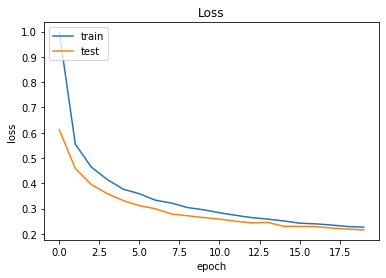

In [42]:
plt.plot(new_model.history.history['loss'])
plt.plot(new_model.history.history['val_loss'])
plt.title("Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [43]:
# Making predictions on Test dataset
predicted_test_labels = new_model.predict(test_images_norm)

In [44]:
predicted_test_labels[88]

array([9.87520218e-01, 1.59052270e-05, 4.66911879e-04, 6.87432534e-04,
       2.17369652e-05, 1.04057006e-06, 1.11847995e-02, 4.27542730e-08,
       1.01385718e-04, 4.74178478e-07], dtype=float32)

In [45]:
predicted_test_labels_index = np.argmax(predicted_test_labels[88])
predicted_test_labels_index

0